### Loading Libraries and Dataset

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv(r"C:\Users\jolis\Documents\Portfolio Files\03_Customer_Churn\Customer-Churn-Records.csv")
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction_Score,Card_Type,Point_Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0,0,1,DIAMOND,300
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,0,5,PLATINUM,771
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1,1,3,SILVER,564
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,1,2,GOLD,339


### EDA

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   RowNumber           10000 non-null  int64  
 1   CustomerId          10000 non-null  int64  
 2   Surname             10000 non-null  object 
 3   CreditScore         10000 non-null  int64  
 4   Geography           10000 non-null  object 
 5   Gender              10000 non-null  object 
 6   Age                 10000 non-null  int64  
 7   Tenure              10000 non-null  int64  
 8   Balance             10000 non-null  float64
 9   NumOfProducts       10000 non-null  int64  
 10  HasCrCard           10000 non-null  int64  
 11  IsActiveMember      10000 non-null  int64  
 12  EstimatedSalary     10000 non-null  float64
 13  Exited              10000 non-null  int64  
 14  Complain            10000 non-null  int64  
 15  Satisfaction_Score  10000 non-null  int64  
 16  Card_

In [4]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction_Score,Point_Earned
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203800,0.204400,3.013800,606.515100
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402842,0.403283,1.405919,225.924839
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000,0.000000,1.000000,119.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000,0.000000,2.000000,410.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000,0.000000,3.000000,605.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000,0.000000,4.000000,801.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000,1.000000,5.000000,1000.000000


### Correlation Analysis

In [5]:
numeric_df = df.select_dtypes(include=[np.number])
numeric_df.corr()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction_Score,Point_Earned
RowNumber,1.000000,0.004202,0.005840,0.000783,-0.006495,-0.009067,0.007246,0.000599,0.012044,-0.005988,-0.016140,-0.016957,0.009289,0.002360
CustomerId,0.004202,1.000000,0.005308,0.009497,-0.014883,-0.012419,0.016972,-0.014025,0.001665,0.015271,-0.006203,-0.007293,-0.000865,-0.013076
CreditScore,0.005840,0.005308,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.026771,-0.027048,-0.012599,0.000077
Age,0.000783,0.009497,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285296,0.283530,-0.000876,0.002222
Tenure,-0.006495,-0.014883,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.013656,-0.013047,0.008663,-0.010196
Balance,-0.009067,-0.012419,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118577,0.119124,-0.002588,0.014608
NumOfProducts,0.007246,0.016972,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047611,-0.046357,-0.011394,-0.015330
HasCrCard,0.000599,-0.014025,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.006976,-0.007095,-0.000212,-0.011041
IsActiveMember,0.012044,0.001665,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156356,-0.154741,0.010236,-0.004983
EstimatedSalary,-0.005988,0.015271,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012490,0.012494,-0.013747,-0.001515


<function matplotlib.pyplot.show(close=None, block=None)>

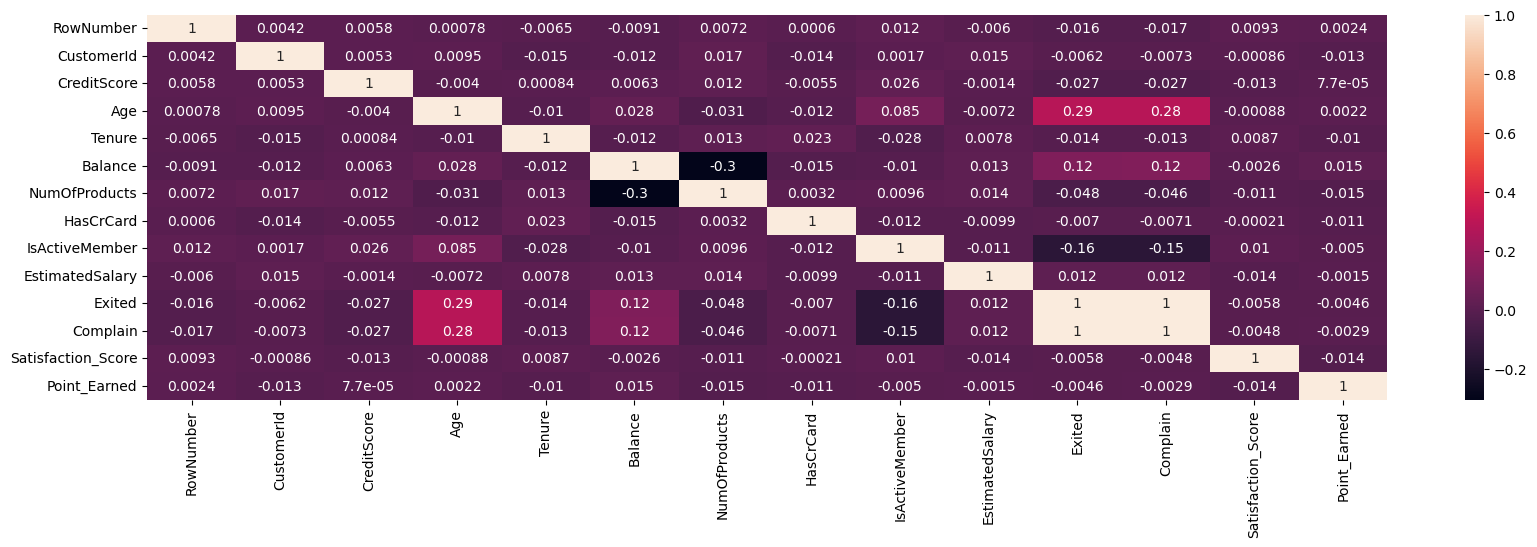

In [14]:
sns.heatmap(numeric_df.corr(), annot = True)

plt.rcParams['figure.figsize'] = (20,5)

plt.show

#### Notes

Based on the correlation values with the Exited Column, The following variables seem to be significantly correlated 

_Compliant_: 2044 Customers Complained and 2034 ppl exited after compliaining. Therefore there is a very high correlation (0.996) with churn, indicating that customers who file complaints are almost always likely to leave. Complaint management and resolution processes are likely critical to retention.

_Age_: Correlation (0.285)

_Balance_: Correlation (0.119)

_isActiveMember_: Correlation (-0.156) IsActiveMember: There is a moderate negative correlation (-0.156) with churn, implying that active members are less likely to leave. Engaging customers through products and services they use regularly might improve retention.

Additionaly Some Variable have lower correlation but could still be a factor

_NumofProducts_: Correlation (-0.048)

_Satisfaction Score_: Correlation (-0.0058): While the Correlation of Satisfaction score with repects to exited seem insignificant, However analysis on the satisfication score while incoporating other variables like balance and Num of products may provide some important insight.

### Age

C:\Users\jolis\AppData\Local\Temp\ipykernel_28204\3867575207.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  Num_of_customers_by_age_group = df2.groupby('AgeGroup')['RowNumber'].count()


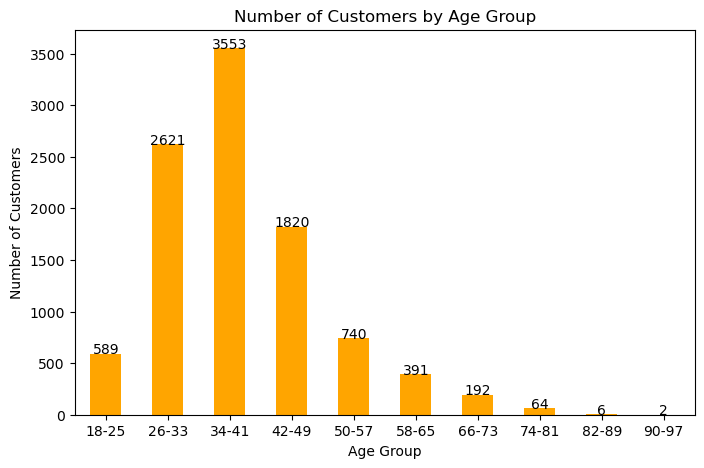

In [21]:
df2 =df
# Define age bins and labels
age_bins = [18, 25, 33, 41, 49, 57, 65, 73, 81, 89, 97]
age_labels = ['18-25', '26-33', '34-41', '42-49', '50-57', '58-65', '66-73', '74-81', '82-89','90-97']

# Create a new column for age groups
df2['AgeGroup'] = pd.cut(df2['Age'], bins=age_bins, labels=age_labels)

Num_of_customers_by_age_group = df2.groupby('AgeGroup')['RowNumber'].count()

ax= Num_of_customers_by_age_group.plot(kind = 'bar', color = 'Orange', figsize=(8, 5) )
plt.title('Number of Customers by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Customers')
plt.xticks(rotation = 360)
for i, v in enumerate(Num_of_customers_by_age_group):
    ax.text(i, v + 1.5, f"{v:.0f}", ha='center', color='black', fontweight='light')
fig.tight_layout()
plt.show()

C:\Users\jolis\AppData\Local\Temp\ipykernel_28204\1608187542.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  exit_rate_by_age_group = df2.groupby('AgeGroup')['Exited'].mean() * 100


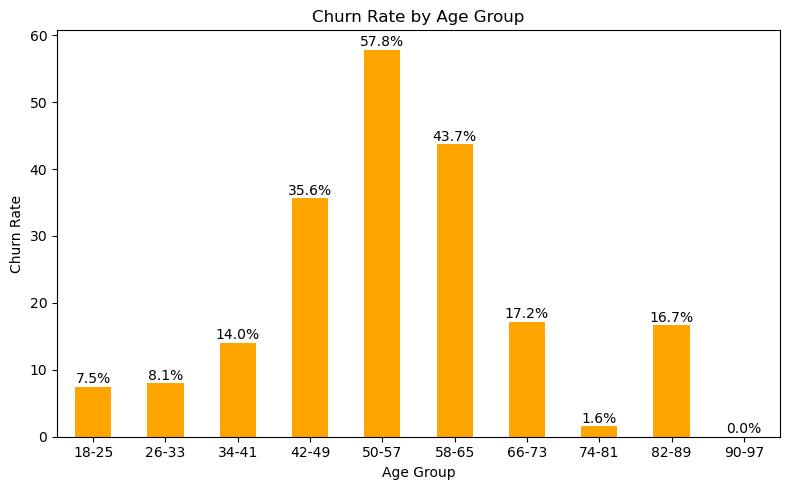

In [22]:
# Define age bins and labels
age_bins = [18, 25, 33, 41, 49, 57, 65, 73, 81, 89, 97]
age_labels = ['18-25', '26-33', '34-41', '42-49', '50-57', '58-65', '66-73', '74-81', '82-89','90-97']

# Create a new column for age groups
df2['AgeGroup'] = pd.cut(df2['Age'], bins=age_bins, labels=age_labels)

exit_rate_by_age_group = df2.groupby('AgeGroup')['Exited'].mean() * 100

fig, ax = plt.subplots(figsize=(8, 5))

exit_rate_by_age_group.plot(kind='bar', color='orange', ax=ax)
plt.title('Churn Rate by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Churn Rate')
plt.xticks(rotation = 360)
for i, v in enumerate(exit_rate_by_age_group):
    plt.text(i, v + 0.5, f"{v:.1f}%", ha='center', color='black', fontweight='light')
    
fig.tight_layout()
plt.show()

**Key Takeaways**


* Middle-aged customers (34-57) are at the highest risk of churn. Possible reasons could be competition, changing needs, or dissatisfaction.

* Older customers (66+) are more stable. If they stay past a certain age, they likely remain long-term.

* Young customers (18-33) have high retention. This could be an opportunity to focus on engaging them early for long-term loyalty.


**Recommendations**

* Retention efforts should focus on the 34-57 age group—maybe personalized offers, better customer service, or loyalty programs.

* Understand why middle-aged customers leave—conduct surveys or analyze their behavior before churn.

* Leverage the loyalty of older customers—potentially offering long-term incentives or referral programs.

### Balance

In [9]:
# Group by 'Exited' and calculate summary statistics for 'Balance'
stats = df2.groupby('Exited')['Balance'].describe()

# Display the summary statistics
print(stats)


         count          mean           std  min         25%        50%  \
Exited                                                                   
0       7962.0  72742.750663  62851.577108  0.0      0.0000   92063.06   
1       2038.0  91109.476006  58346.483197  0.0  38591.2225  109344.23   

                75%        max  
Exited                          
0       126419.3300  221532.80  
1       131423.6375  250898.09  


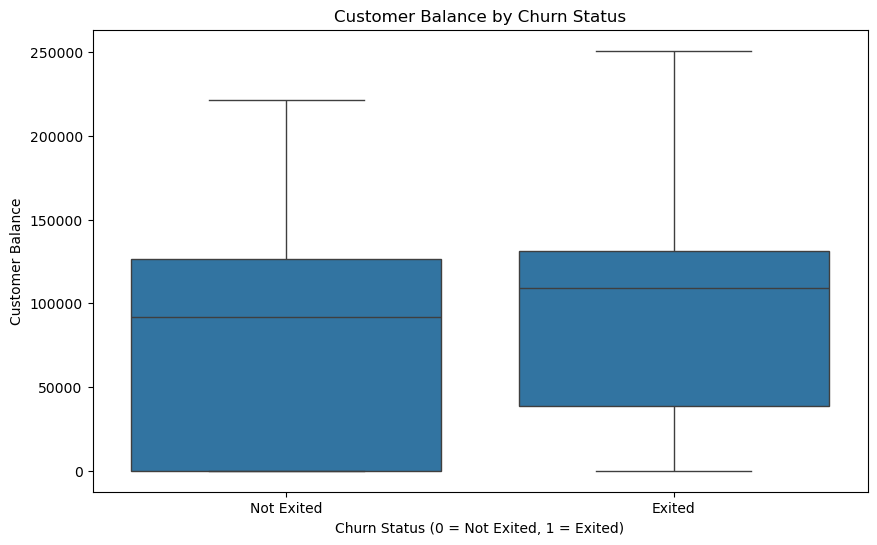

In [10]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Exited', y='Balance', data=df)
plt.title('Customer Balance by Churn Status')
plt.xlabel('Churn Status (0 = Not Exited, 1 = Exited)')
plt.ylabel('Customer Balance')
plt.xticks([0, 1], ['Not Exited', 'Exited'])
fig.tight_layout()
plt.show()

* The average balance of customers who stayed is approximately 72,743 and  customers who exited is approximately 91,109. 
* The quartile statistics suggest that customers who exited tend to have higher balances across the board compared to those who stayed.

This sugest that customers with higher balances might be more likely to leave, indicating a possible disconnection with how the bank meets the needs of wealthier clients

Potential Areas for Investigation: Given that customers with higher balances are exiting, further analysis could explore:

Customer satisfaction levels among high-balance customers.

Reasons for exit, perhaps through customer feedback or exit interviews.

Product offerings and their perceived value to these high-balance customers.

### Satisfaction Score

In [11]:
# Assuming you have a 'Satisfaction Score' column and defined a high-balance threshold
high_balance_threshold = df2['Balance'].quantile(0.75)  # Top 25% as high balance
df2['Balance_Segment'] = pd.cut(df2['Balance'], bins=[0, high_balance_threshold, df2['Balance'].max()], labels=['Low-Medium', 'High'])

# Calculate average satisfaction scores for each balance segment
satisfaction_summary = df2.groupby('Balance_Segment')['Satisfaction_Score'].mean()
print(satisfaction_summary)


Balance_Segment
Low-Medium    3.046871
High          2.974400
Name: Satisfaction_Score, dtype: float64


C:\Users\jolis\AppData\Local\Temp\ipykernel_28204\3994445885.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  satisfaction_summary = df2.groupby('Balance_Segment')['Satisfaction_Score'].mean()


#### Key Takeaways from the Satisfaction Scores
* Lower Satisfaction in High-Balance Customers:

Customers with higher balances have a lower average satisfaction score compared to those with lower or medium balances.
Although the difference is modest, it suggests that high-balance customers may have unmet expectations or potentially face issues leading to slightly lower satisfaction.

*Potential Drivers of Churn for High-Balance Customers:*
Since you previously identified that higher-balance customers are more likely to leave (higher churn rate), this lower satisfaction level indicates that High-balance customers may feel they aren't receiving enough value for their level of commitment to the bank, especially if they expect more personalized services or benefits in return for their large balances.

### Geography

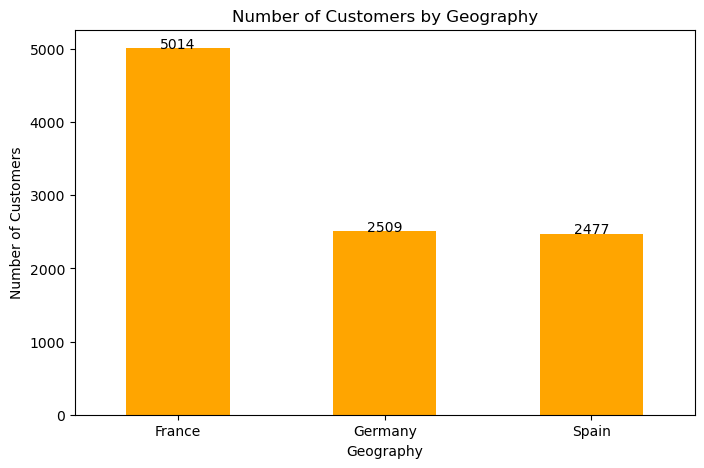

In [26]:
Num_of_customers_by_geo = df2.groupby('Geography')['RowNumber'].count()

ax= Num_of_customers_by_geo.plot(kind = 'bar', color = 'Orange', figsize=(8, 5) )
plt.title('Number of Customers by Geography')
plt.xlabel('Geography')
plt.ylabel('Number of Customers')
plt.xticks(rotation = 360)
for i, v in enumerate(Num_of_customers_by_geo):
    ax.text(i, v + 1.5, f"{v:.0f}", ha='center', color='black', fontweight='light')
fig.tight_layout()
plt.show()

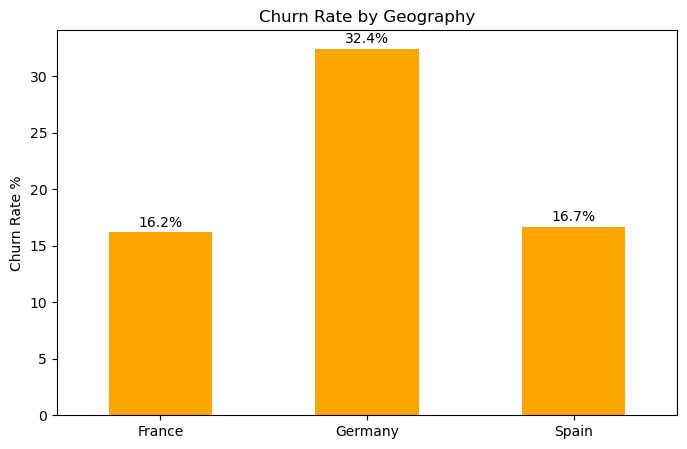

In [13]:
Churn_rate_by_geography = df2.groupby('Geography')['Exited'].mean() * 100

ax= Churn_rate_by_geography.plot(kind = 'bar', color = 'Orange', figsize=(8, 5) )
plt.title('Churn Rate by Geography')
plt.xlabel('')
plt.ylabel('Churn Rate %')
plt.xticks(rotation = 360)
for i, v in enumerate(Churn_rate_by_geography):
    plt.text(i, v + 0.5, f"{v:.1f}%", ha='center', color='black', fontweight='light')
plt.show()

**Customer Distribution** 


France has the highest number of customers (5,014), nearly double that of Germany (2,509) and Spain (2,477). Germany and Spain have a similar customer base, but their churn rates differ significantly.

* Germany has the highest churn rate (32.4%), meaning nearly one-third of customers are leaving—a major retention issue.

* Spain (16.7%) and France (16.2%) have similar churn rates, which are much lower than Germany’s.


**Key Takeaways**


- Germany is a high-risk market with significant customer loss. It may be due to competition, dissatisfaction, or pricing issues.

- France, despite having the largest customer base, has a relatively low churn rate (16.2%), suggesting strong retention strategies.

- Spain also maintains a stable customer base with a moderate churn rate (16.7%), similar to France.



**Recommendations**


- Investigate why churn is so high in Germany—consider customer feedback, service quality, or competitor analysis.

- Leverage France’s strong retention by expanding customer engagement programs or upselling opportunities.

- Spain appears stable, but monitoring trends and refining retention strategies can further reduce churn.